In [561]:
# Install necessary libraries using pip if not already installed
# !pip install pandas seaborn matplotlib numpy scikit-learn statsmodels

import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import f1_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler
import math
# To suppress warnings
import warnings
warnings.filterwarnings('ignore')

# To reproduce outputs
rs = 50 # random state

### DATA EXPLORATION

In [562]:
# Load data
data = pd.read_csv("breast_cancer.csv")

# Display structure and dimensions of the data
print(data.info())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [563]:
data.head(15)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


In [564]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


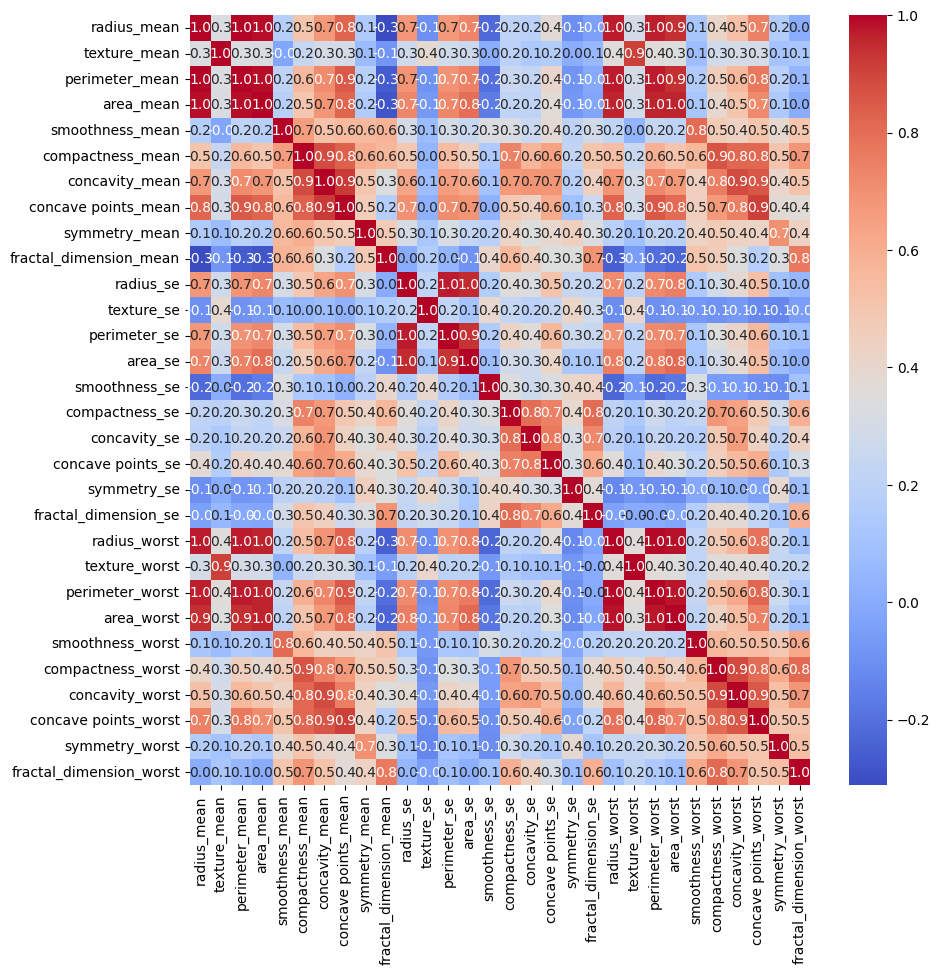

In [565]:
# Compute the correlation matrix
corr_mat = data.iloc[:, 2:].corr()
# Plot the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(corr_mat, annot=True, fmt=".1f", cmap="coolwarm")
plt.show()

In [566]:
# Convert diagnosis column to a categorical type
data['diagnosis'] = pd.Categorical(data['diagnosis'])   

# Optionally, relabel the diagnosis column
data['diagnosis'] = data['diagnosis'].cat.rename_categories(["B", "M"])

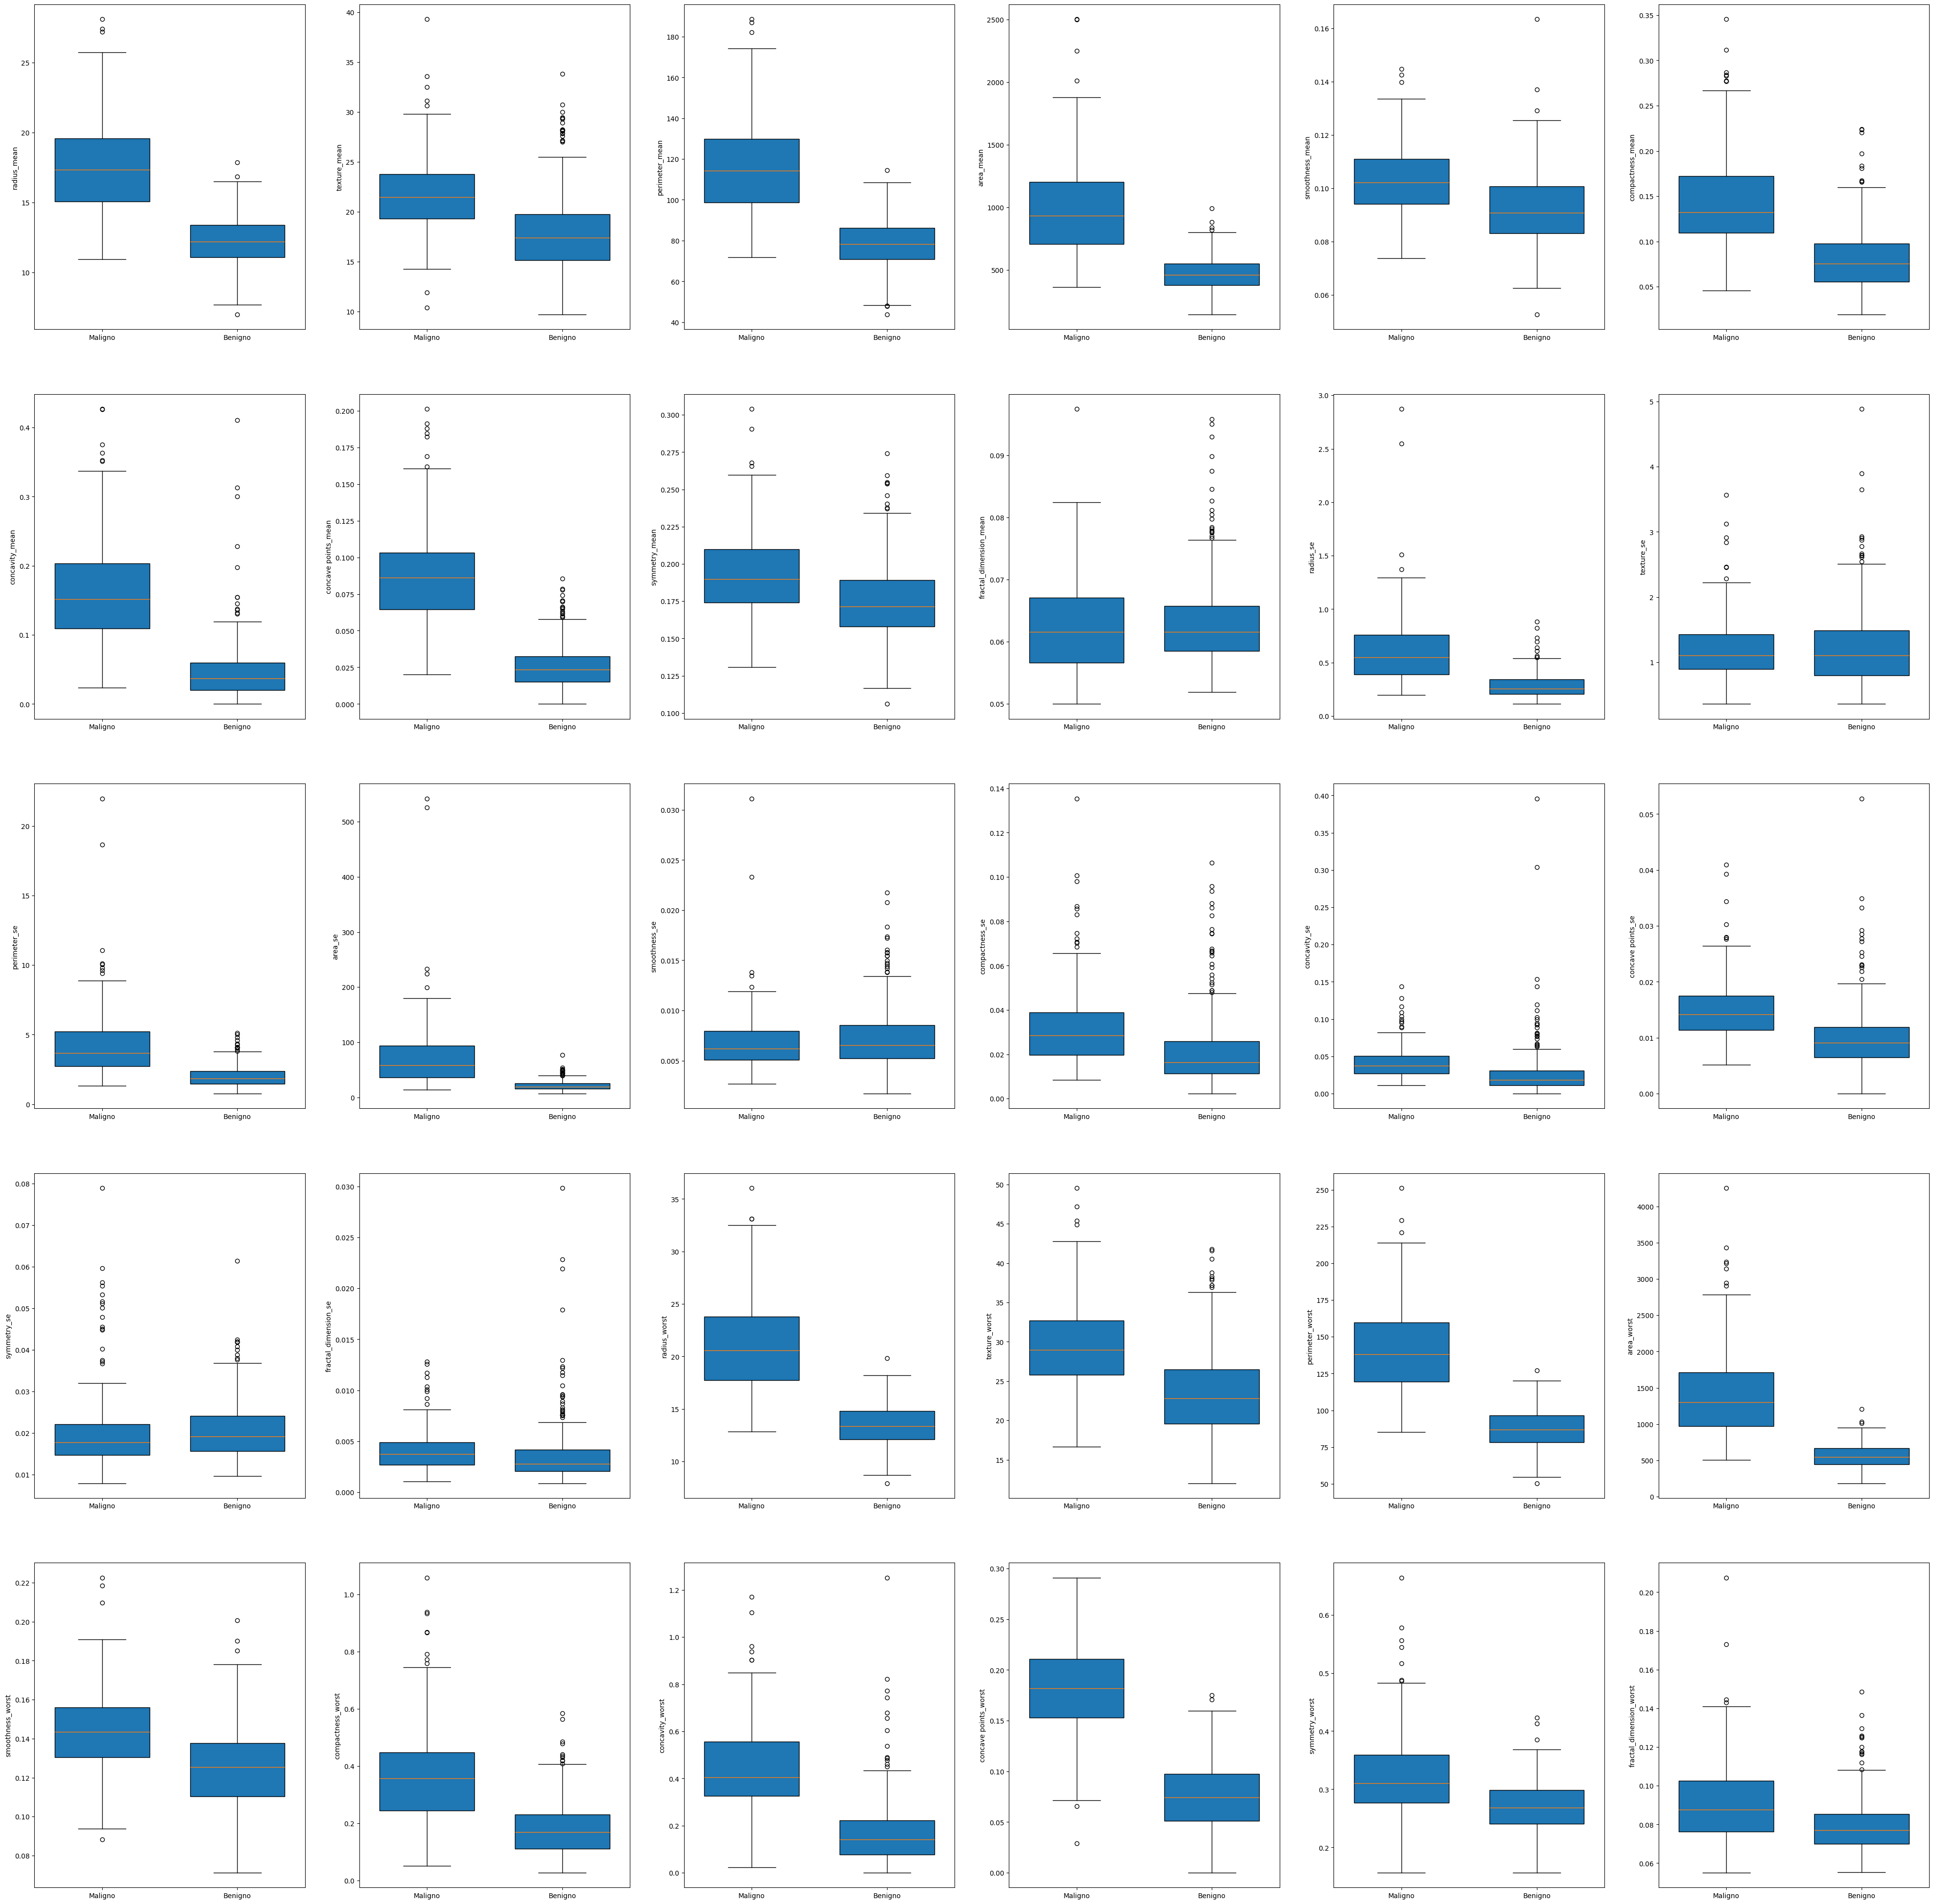

In [567]:
# Boxplots for each feature grouped by diagnosis
num_colonne = data.shape[1]
plots_list = []

fig, axs = plt.subplots(5, 6, figsize=(50, 50))

for i in range(2, num_colonne):
    row = (i-2) // 6
    col = (i-2) % 6

    axs[row, col].set_ylabel(data.columns[i])  # Set the y-axis label to the feature name
    axs[row, col].boxplot(
        [data[data["diagnosis"] == "M"].iloc[:, i], data[data["diagnosis"] == "B"].iloc[:, i]], 
        positions=[1, 2], 
        widths=0.7,
        patch_artist=True,
        labels=["Maligno", "Benigno"],
    )

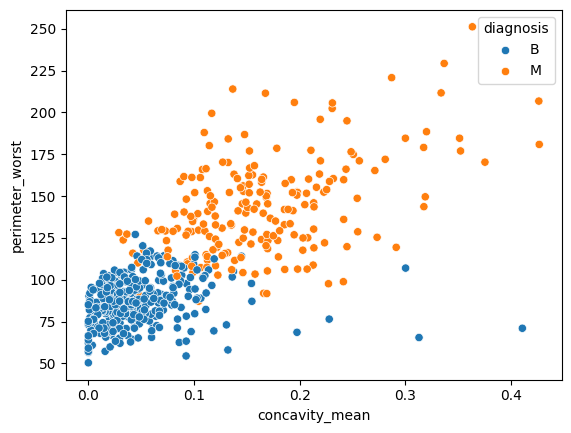

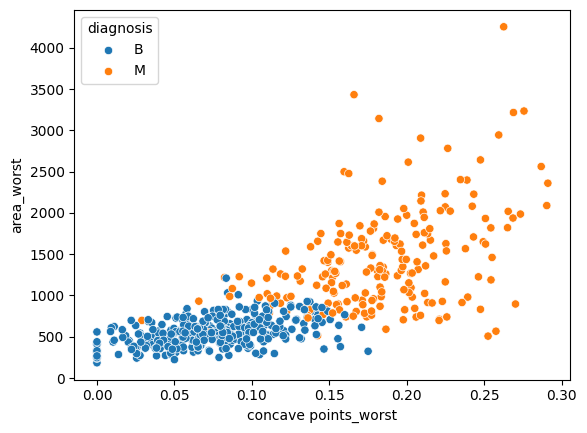

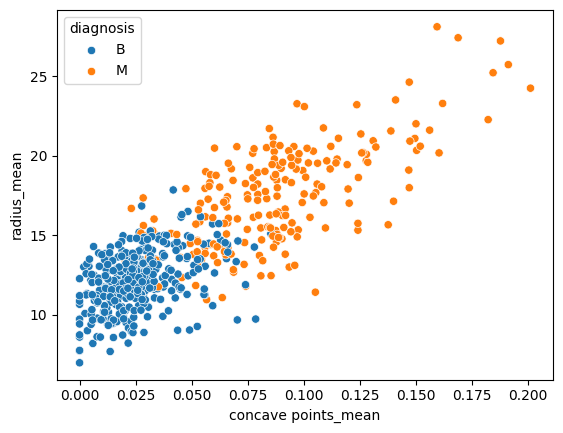

In [568]:
# Scatter plot examples
sns.scatterplot(x='concavity_mean', y='perimeter_worst', hue='diagnosis', data=data)
plt.show()

sns.scatterplot(x='concave points_worst', y='area_worst', hue='diagnosis', data=data)
plt.show()

sns.scatterplot(x='concave points_mean', y='radius_mean', hue='diagnosis', data=data)
plt.show()

### MODEL SELECTION

In [569]:
# Sample size evaluation

# Convert  y_test values from 'B' and 'M' to 0 and 1
y_binary = np.array([0 if char == 'B' else 1 for char in data['diagnosis']])

# Modify the column
data['diagnosis'] = y_binary

# Evaluate positive values (malignant)
num_positivi = data['diagnosis'].sum()

# Number of observations in the dataset
n = len(data)

# Evaluate the prevalence
prevalenza = num_positivi / n

# Number of events (positive cases)
n_eventi = n * prevalenza
print(f"Number of positive events expected: {n_eventi}")

# Minimum number of events necessary (rule of 10 events per variable)
n_variabili = 2
min_eventi_necessari = 10 * n_variabili
print(f"Minimum number of necessary events: {min_eventi_necessari}")

# Verify whether the sample size is sufficient or not
if n_eventi >= min_eventi_necessari:
    print("The sample size is sufficient for the logistic regression model")
else:
    print("The sample size is not sufficient for the logistic regression model")

Number of positive events expected: 212.0
Minimum number of necessary events: 20
The sample size is sufficient for the logistic regression model


In [570]:
# Split data into train, test and validation
train, test = train_test_split(data, test_size=0.25, random_state=rs)

In [571]:
# odds ratio evaluation for features selection
scaler = StandardScaler()
important_features = [
  "radius_mean",
  "texture_mean",
  "compactness_mean",
  "concave points_mean",
]

for feature in important_features:
  lr = LogisticRegression()
  lr = lr.fit(scaler.fit_transform(train[[feature]]), train['diagnosis'])
  print(f"{feature} OR: {np.exp(lr.coef_[0][0]):.3f}")

radius_mean OR: 22.369
texture_mean OR: 2.924
compactness_mean OR: 7.070
concave points_mean OR: 38.935


In [572]:
# feature_1 = "radius_mean"
# feature_2 = "concave points_mean"
feature_1 = "texture_mean"
feature_2 = "concave points_mean"
# Separate the features and target variable for training
X_train = pd.DataFrame(scaler.fit_transform(train[[feature_1, feature_2]]), columns=[feature_1, feature_2])
y_train = train['diagnosis']

# Separate the features and target variable for testing
X_test = pd.DataFrame(scaler.fit_transform(test[[feature_1, feature_2]]), columns=[feature_1, feature_2])
y_test = test['diagnosis']

#### Logistic Regression

In [573]:
# Create the model
log_reg = LogisticRegression(C=1e10, solver='liblinear')

# Fit the model
log_reg.fit(X_train, y_train)

# Get coefficients
coeff = pd.DataFrame(log_reg.coef_.transpose(), index=[feature_1, feature_2], columns=['Coefficient'])
print(coeff)

                     Coefficient
texture_mean            1.392294
concave points_mean     4.660824


EVALUATION OF THE MODEL

In [574]:
# Confusion Matrix for sensitivity and specificity

# Make predictions
pred_class = log_reg.predict(X_test)
pred_proba = log_reg.predict_proba(X_test)

# Evaluate the model performance
conf_matrix = confusion_matrix(y_test, pred_class)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[85  5]
 [ 3 50]]


In [575]:
# Classification report
report = classification_report(y_test, pred_class, target_names=["B", "M"])
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           B       0.97      0.94      0.96        90
           M       0.91      0.94      0.93        53

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



In [576]:
# Odds Ratio

# Take the coefficents from the fitted model
coefficients = log_reg.coef_[0]

# Evaluate the odds ratio
odds_ratios = np.exp(coefficients)

# Create a dataframe to view the results
feature_names = [feature_1, feature_2]
odds_ratios_df = pd.DataFrame({
  'Feature': feature_names,
  'Coefficient': coefficients,
  'Odds Ratio': odds_ratios
})

print(odds_ratios_df)

               Feature  Coefficient  Odds Ratio
0         texture_mean     1.392294    4.024070
1  concave points_mean     4.660824  105.723182


PLATT SCALING FOR CALIBRATION

[0.0, 0.125, 0.2857142857142857, 0.0, 0.75, 0, 0.3333333333333333, 0.6, 0.9772727272727273]


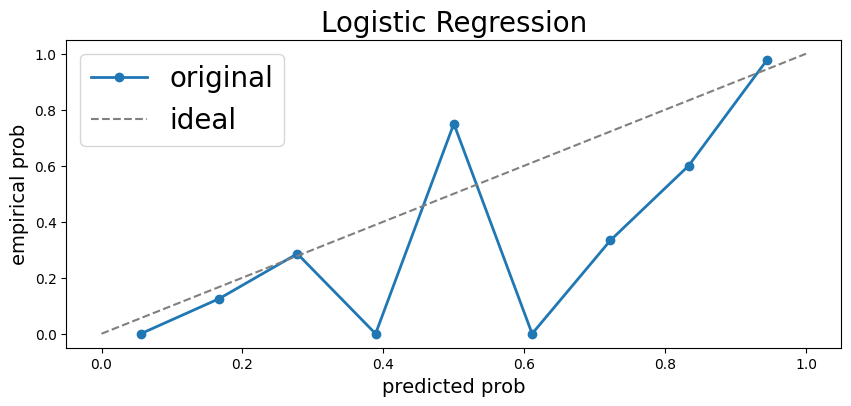

In [577]:
# Predicted probabilities
pred_probs_test = log_reg.predict_proba(X_test)[:,1]
# Space of probability with 10 intervals
pred_probs_space = np.linspace(pred_probs_test.min(), pred_probs_test.max(), 10)

empirical_probs = []
pred_probs_midpoints = []

# Empirical probabilities and midpoints
for i in range(len(pred_probs_space) - 1):
    mask = (pred_probs_test > pred_probs_space[i]) & (pred_probs_test <= pred_probs_space[i + 1])
    if np.sum(mask) > 0:
        empirical_probs.append(np.mean(y_test[mask]))
        pred_probs_midpoints.append((pred_probs_space[i] + pred_probs_space[i + 1]) / 2)
    else:
        empirical_probs.append(np.nan)
        pred_probs_midpoints.append((pred_probs_space[i] + pred_probs_space[i + 1]) / 2)


# Plotting
empirical_probs = [0 if math.isnan(item) else item for item in empirical_probs]
plt.figure(figsize=(10,4))
plt.plot(pred_probs_midpoints, empirical_probs, linewidth=2, marker='o')
plt.title('Logistic Regression', fontsize=20)
plt.xlabel('predicted prob', fontsize=14)
plt.ylabel('empirical prob', fontsize=14)
plt.plot([0,1],[0,1],linestyle='--',color='gray')
plt.legend(['original', 'ideal'], fontsize=20)


print(empirical_probs)

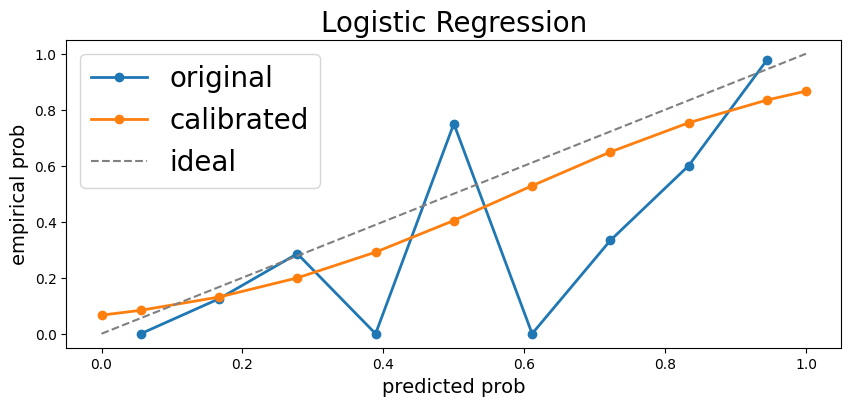

In [578]:
# We now create a new model using the predicted probabilites as input in order to calibrate the original probabilites predicted
lr_model = LogisticRegression()
lr_model.fit(pred_probs_test.reshape(-1,1), y_test)

# Calibrated probabilities
calibrated_probs = lr_model.predict_proba(np.array([0.0]+pred_probs_midpoints+[1.0]).reshape(-1,1))[:,1]
    
# Plotting
plt.figure(figsize=(10,4))
plt.plot(pred_probs_midpoints, empirical_probs, linewidth=2, marker='o')
plt.title('Logistic Regression', fontsize=20)
plt.xlabel('predicted prob', fontsize=14)
plt.ylabel('empirical prob', fontsize=14)
plt.plot([0.0]+pred_probs_midpoints+[1.0], calibrated_probs, linewidth=2, marker='o')
plt.plot([0,1],[0,1],linestyle='--',color='gray')
plt.legend(['original', 'calibrated', 'ideal'], fontsize=20)

0.9861635220125786


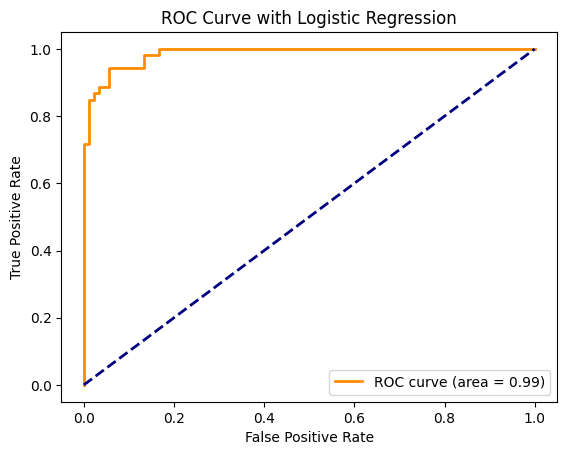

In [579]:
# AUC-ROC Curve

# Evaluate AUC score
auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])
print(auc)

# True positive and False positive
fpr, tpr, thresholds = roc_curve(y_test, pred_probs_test)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Logistic Regression')
plt.legend(loc="lower right")
plt.show()

### Decision tree 3

In [580]:
trees_train = train.drop(["diagnosis"], axis=1)
trees_test = test.drop(["diagnosis"], axis=1)
dec_tree = tree.DecisionTreeClassifier(random_state=rs)
dec_tree = dec_tree.fit(trees_train, train["diagnosis"])

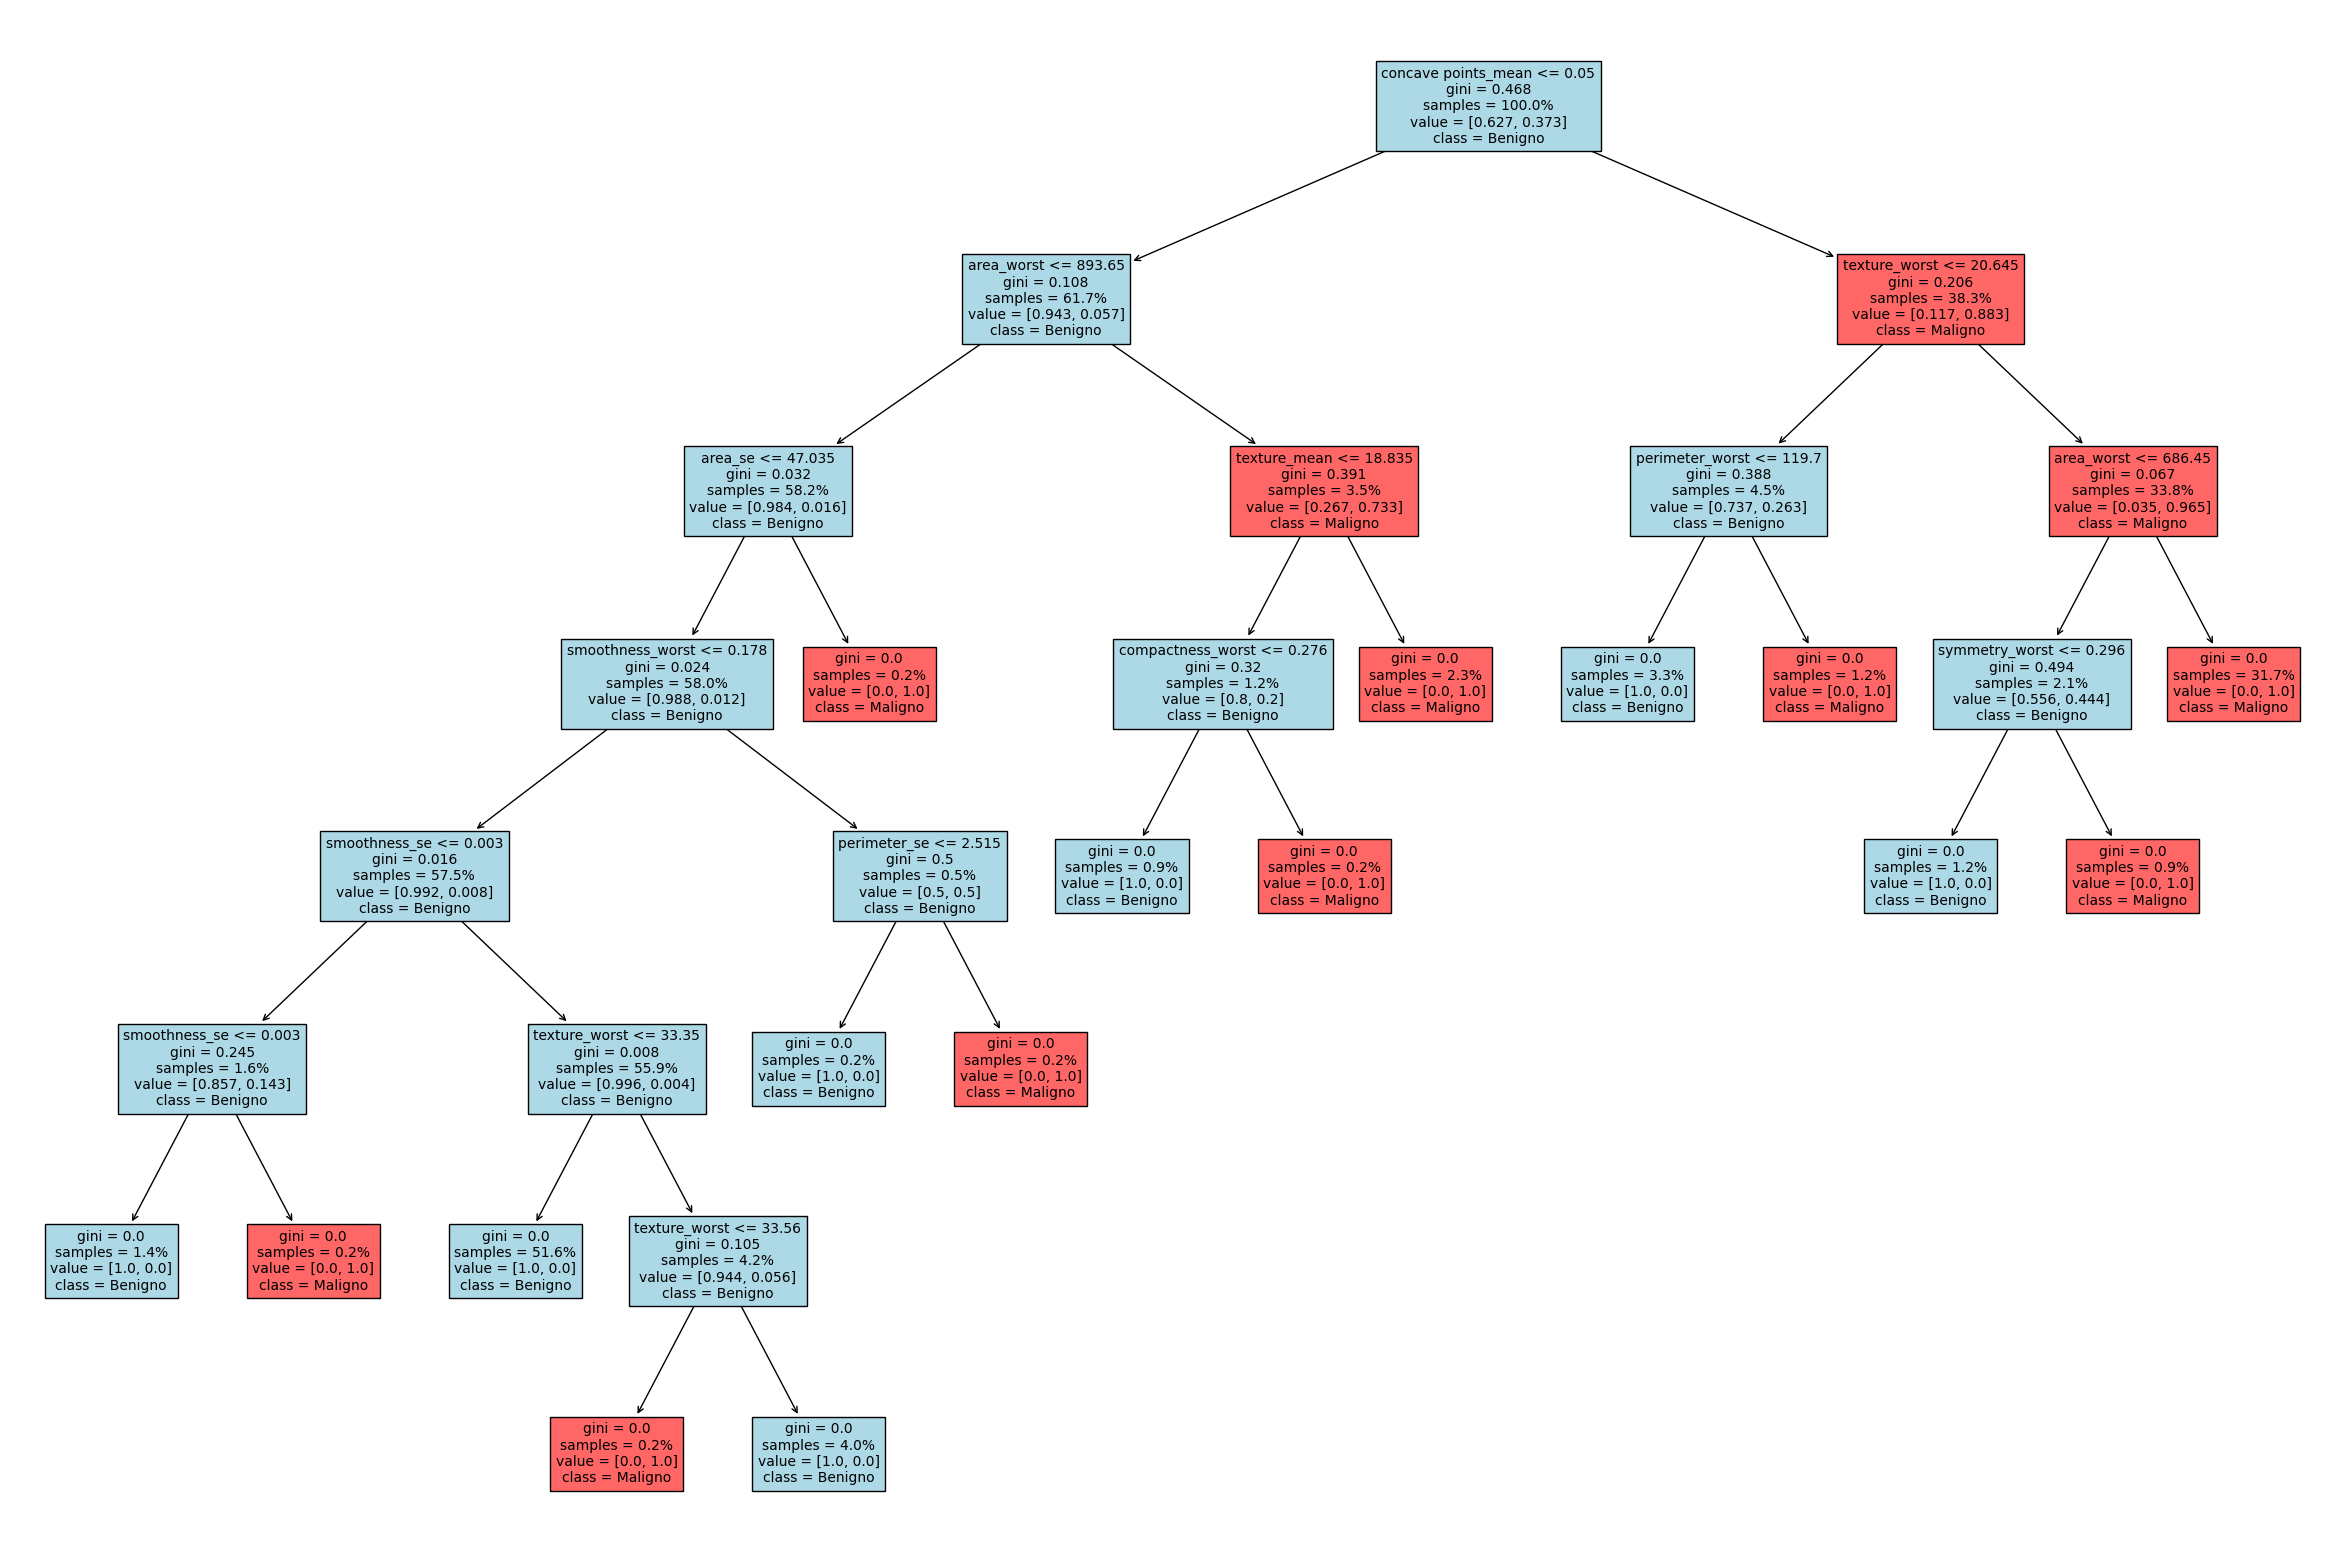

In [581]:
columns_names = data.columns.tolist()
benigno_label = "Benigno"
maligno_label = "Maligno"
benigno_color = "lightblue"
maligno_color = (1.0, 0.4, 0.4)
del columns_names[1]

tree.plot_tree(
  dec_tree,
  feature_names=columns_names,
  class_names=[benigno_label, maligno_label],
  fontsize=10,
  filled=True,
  proportion=True,
)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(30, 20)

for node in plt.gca().get_children():
  if isinstance(node, matplotlib.text.Annotation):
    if benigno_label in node.get_text():
      node.get_bbox_patch().set_facecolor(benigno_color)
    if maligno_label in node.get_text():
      node.get_bbox_patch().set_facecolor(maligno_color)


fig.savefig('tree.png')

In [582]:
# Evaluating the model

# Classification report
predictions_tree = dec_tree.predict(trees_test)
report = classification_report(y_test, predictions_tree, target_names=["B", "M"])
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           B       0.98      0.89      0.93        90
           M       0.84      0.96      0.89        53

    accuracy                           0.92       143
   macro avg       0.91      0.93      0.91       143
weighted avg       0.92      0.92      0.92       143



In [583]:
# Confusion Matrix
conf_matrix_tree = confusion_matrix(y_test, predictions_tree)
print("Confusion Matrix:\n", conf_matrix_tree)

Confusion Matrix:
 [[80 10]
 [ 2 51]]


### Random Forest 

In [584]:
rf = RandomForestClassifier(random_state=rs)
rf = rf.fit(trees_train, train["diagnosis"])

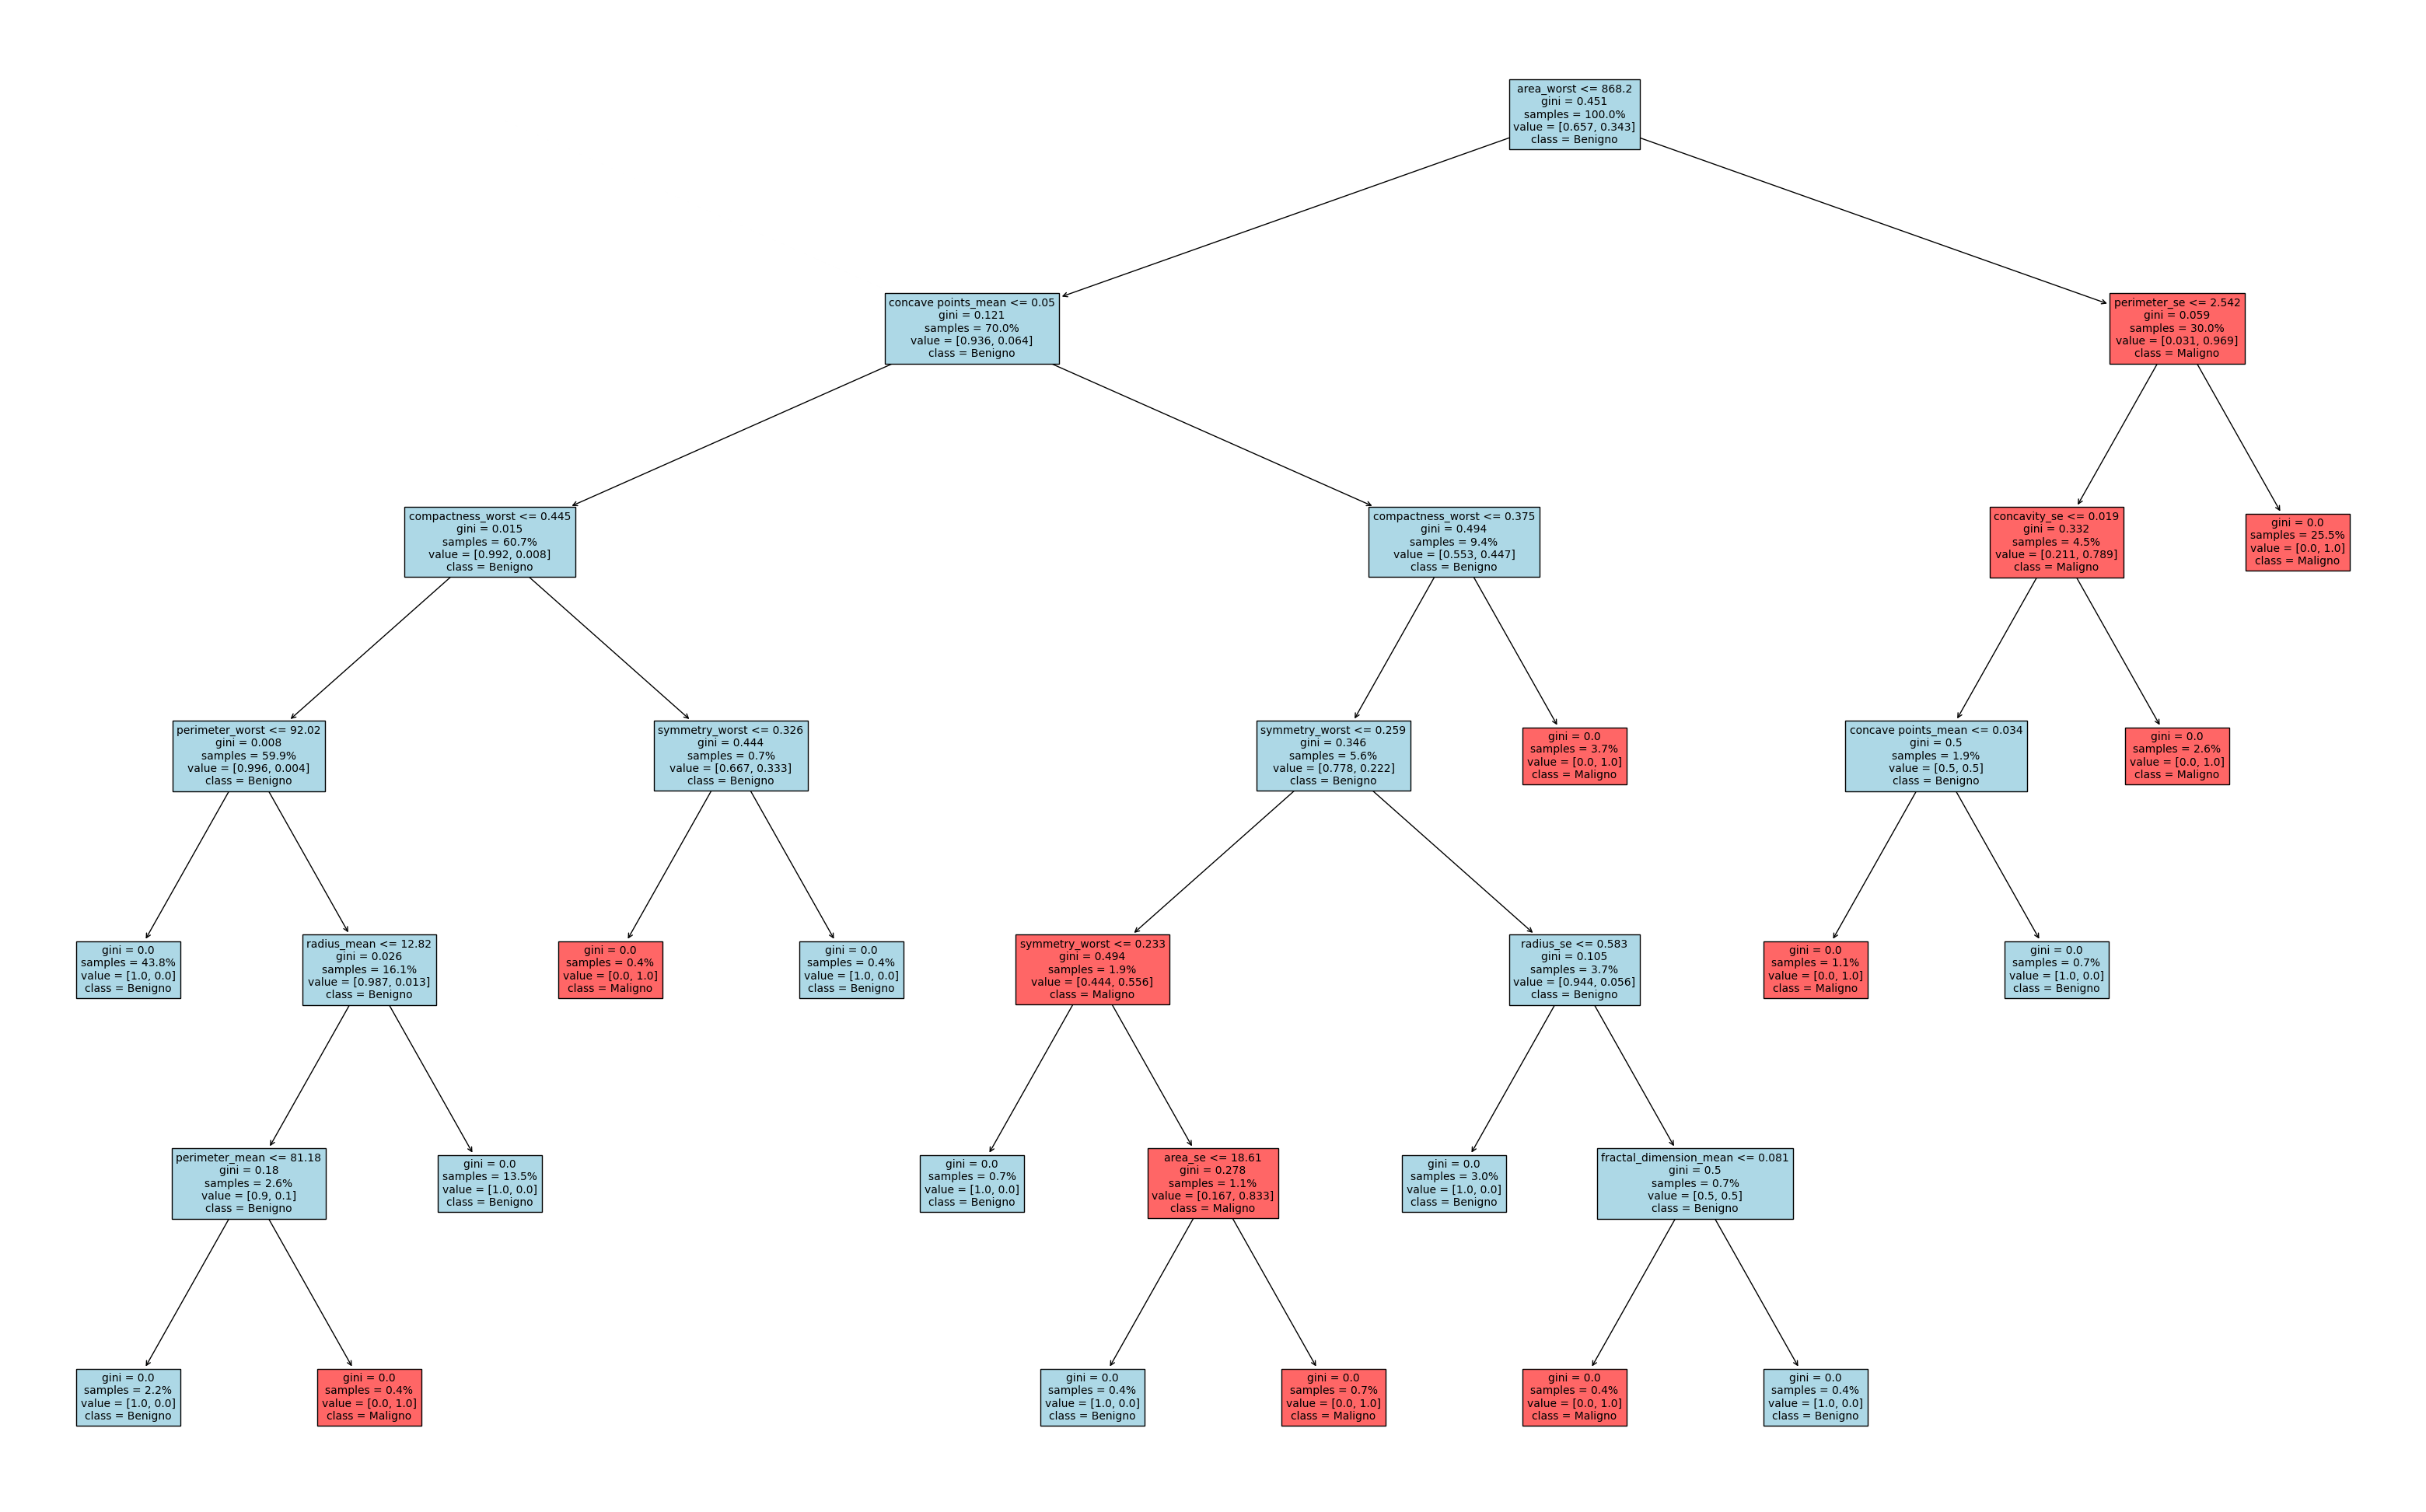

In [585]:
columns_names = data.columns.tolist()
estimator = rf.estimators_[0]

del columns_names[1]
plot_tree(
    estimator,
    feature_names=columns_names,
    class_names=["Benigno", "Maligno"],
    fontsize=10,
    filled=True,
    proportion=True,
)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(40, 25)

for node in plt.gca().get_children():
  if isinstance(node, matplotlib.text.Annotation):
    if benigno_label in node.get_text():
      node.get_bbox_patch().set_facecolor(benigno_color)
    if maligno_label in node.get_text():
      node.get_bbox_patch().set_facecolor(maligno_color)

plt.savefig('Random_forest.png')
plt.show()

In [586]:
# Evaluating the model

# Classification report
predictions_rf = rf.predict(trees_test)
report = classification_report(y_test, predictions_rf, target_names=["B", "M"])
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           B       0.98      0.96      0.97        90
           M       0.93      0.96      0.94        53

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [587]:
# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, predictions_rf)
print("Confusion Matrix:\n", conf_matrix_rf)

Confusion Matrix:
 [[86  4]
 [ 2 51]]


### K-Nearest Neighbours (KNN)

In [588]:
knn_parameters = {"n_neighbors" : [item for item in range(2,100)]}
knn_search = GridSearchCV(
  KNeighborsClassifier(),
  param_grid=knn_parameters,
  cv=5,
  scoring=["accuracy", "f1"],
  return_train_score=True,
  refit="accuracy",
)
knn_search.fit(X_train, y_train)
knn_search_results = pd.DataFrame(knn_search.cv_results_)


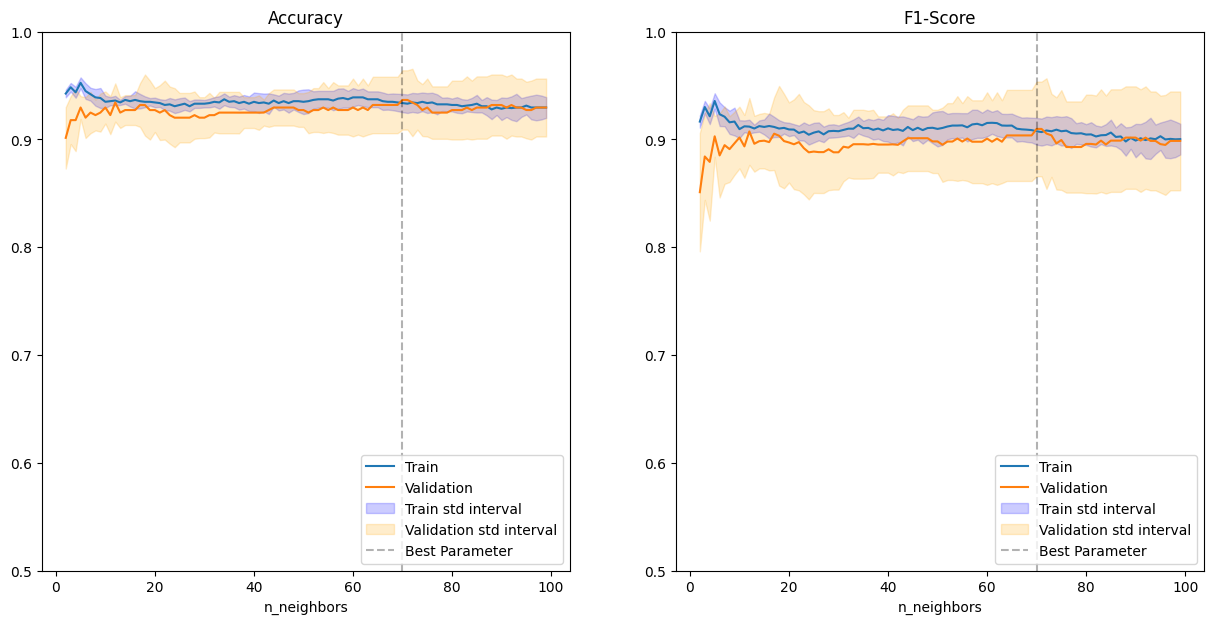

In [589]:
train_acc_interval = (knn_search_results['mean_train_accuracy'] - knn_search_results['std_train_accuracy'], knn_search_results['mean_train_accuracy'] + knn_search_results['std_train_accuracy'])
test_acc_interval = (knn_search_results['mean_test_accuracy'] - knn_search_results['std_test_accuracy'], knn_search_results['mean_test_accuracy'] + knn_search_results['std_test_accuracy'])
train_f1_interval = (knn_search_results['mean_train_f1'] - knn_search_results['std_train_f1'], knn_search_results['mean_train_f1'] + knn_search_results['std_train_f1'])
test_f1_interval = (knn_search_results['mean_test_f1'] - knn_search_results['std_test_f1'], knn_search_results['mean_test_f1'] + knn_search_results['std_test_f1'])

_, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].plot(knn_search_results["param_n_neighbors"], knn_search_results['mean_train_accuracy'], label="Train")
ax[0].plot(knn_search_results["param_n_neighbors"], knn_search_results['mean_test_accuracy'], label="Validation")
ax[1].plot(knn_search_results["param_n_neighbors"], knn_search_results['mean_train_f1'], label="Train")
ax[1].plot(knn_search_results["param_n_neighbors"], knn_search_results['mean_test_f1'], label="Validation")

ax[0].fill_between(knn_search_results["param_n_neighbors"].astype("float"), train_acc_interval[0], train_acc_interval[1], color='blue', alpha=0.2, label='Train std interval')
ax[0].fill_between(knn_search_results["param_n_neighbors"].astype("float"), test_acc_interval[0], test_acc_interval[1], color='orange', alpha=0.2, label='Validation std interval')
ax[1].fill_between(knn_search_results["param_n_neighbors"].astype("float"), train_f1_interval[0], train_f1_interval[1], color='blue', alpha=0.2, label='Train std interval')
ax[1].fill_between(knn_search_results["param_n_neighbors"].astype("float"), test_f1_interval[0], test_f1_interval[1], color='orange', alpha=0.2, label='Validation std interval')
ax[0].axvline(x=knn_search.best_params_['n_neighbors'], color='black', alpha=0.3, linestyle='--', label='Best Parameter')
ax[1].axvline(x=knn_search.best_params_['n_neighbors'], color='black', alpha=0.3, linestyle='--', label='Best Parameter')

ax[0].set_title("Accuracy")
ax[1].set_title("F1-Score")
ax[0].set_xlabel("n_neighbors")
ax[1].set_xlabel("n_neighbors")
ax[0].set_ylim(0.5, 1)
ax[1].set_ylim(0.5, 1)
ax[0].legend(loc="lower right")
ax[1].legend(loc="lower right")

In [590]:
knn = knn_search.best_estimator_
knn.fit(X_train, y_train)
knn_train_prediction = knn.predict(X_train)
knn_test_prediction = knn.predict(X_test)

knn_train_accuracy = sum(knn_train_prediction == y_train) / len(y_train)
knn_test_accuracy = sum(knn_test_prediction == y_test) / len(y_test)
print(f"Train accuracy: {knn_train_accuracy:.3f}")
print(f"Test accuracy: {knn_test_accuracy:.3f}")

Train accuracy: 0.939
Test accuracy: 0.944


In [591]:
# Classification report
report = classification_report(y_test, knn_test_prediction, target_names=["B", "M"])
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           B       0.96      0.96      0.96        90
           M       0.92      0.92      0.92        53

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



In [592]:
# Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, knn_test_prediction)
print("Confusion Matrix:\n", conf_matrix_knn)

Confusion Matrix:
 [[86  4]
 [ 4 49]]


### Support Vectors Classifier (SVC)

In [593]:
parameters = {
    'random_state': [rs],
    'penalty': ['l2'],
    'C':[0.001, 0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20, 25, 30]
}
grid_search = GridSearchCV(
  LinearSVC(),
  parameters,
  cv=5,
  scoring="accuracy",
  return_train_score=True,
  refit="accuracy",
)
grid_search = grid_search.fit(X_train, y_train)
grid_search_results = pd.DataFrame(grid_search.cv_results_)


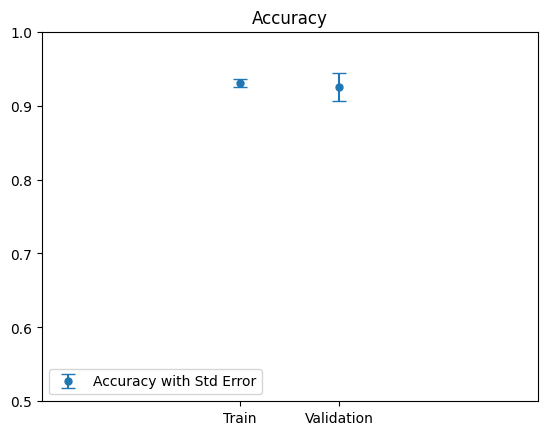

In [594]:
best_result = grid_search_results.iloc[grid_search.best_index_]
train_accuracy = best_result["mean_train_score"]
test_accuracy = best_result["mean_test_score"]
train_accuracy_std = best_result["std_train_score"]
test_accuracy_std = best_result["std_test_score"]

_, ax = plt.subplots()
ax.errorbar([1,2], [train_accuracy, test_accuracy], [train_accuracy_std, test_accuracy_std], fmt='o', capsize=5, markersize=5, label='Accuracy with Std Error')
ax.set_title("Accuracy")
ax.set_xlim(-1, 4)
ax.set_ylim(0.5, 1)
ax.set_xticks([1,2], ["Train", "Validation"])
ax.legend(loc="lower left")

In [595]:
svc = LinearSVC(C=25, random_state=rs)
svc = svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

Text(0.5, 1.0, 'Test')

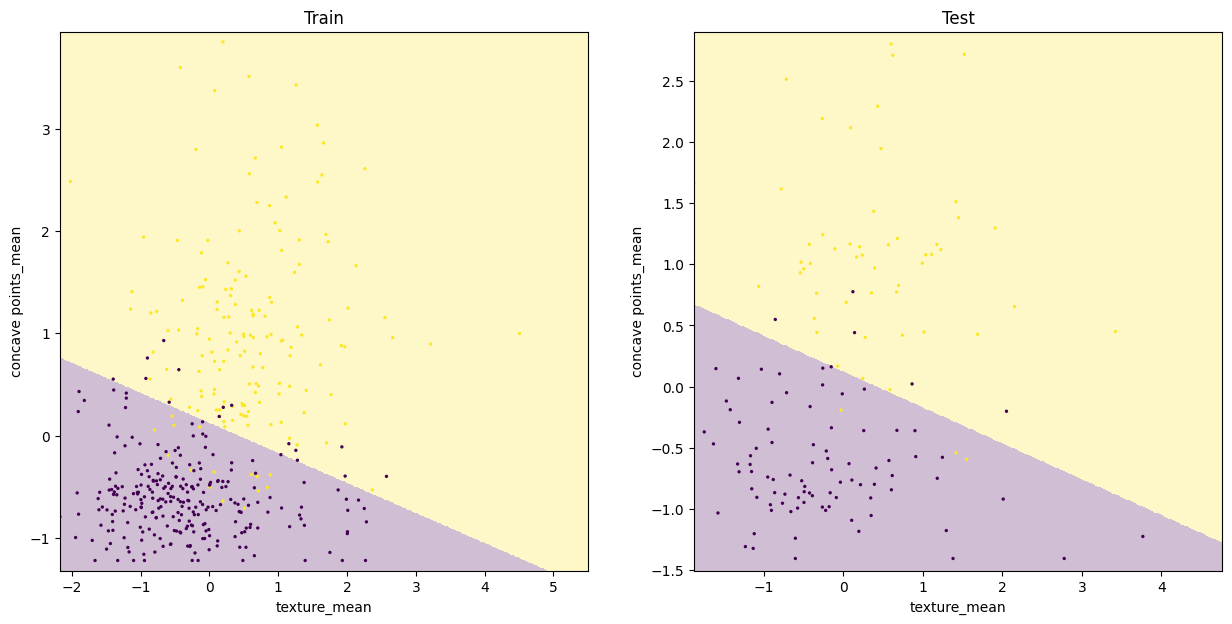

In [596]:
fig, ax = plt.subplots(1,2, figsize=(15,7))

# separator Xs
x_min, x_max = X_train[feature_1].min(), X_train[feature_1].max() + 1
y_min, y_max = X_train[feature_2].min() - 0.1, X_train[feature_2].max() + 0.1
ax[0].set(xlim=(x_min, x_max), ylim=(y_min, y_max))
x_min, x_max = X_test[feature_1].min(), X_test[feature_1].max() + 1
y_min, y_max = X_test[feature_2].min() - 0.1, X_test[feature_2].max() + 0.1
ax[1].set(xlim=(x_min, x_max), ylim=(y_min, y_max))

DecisionBoundaryDisplay.from_estimator(
  estimator=svc,
  X=X_train,
  ax=ax[0],
  response_method="predict",
  plot_method='pcolormesh',
  alpha=0.25,
  grid_resolution=1000
)

DecisionBoundaryDisplay.from_estimator(
  estimator=svc,
  X=X_train,
  ax=ax[1],
  response_method="predict",
  plot_method='pcolormesh',
  alpha=0.25,
  grid_resolution=1000
)
ax[0].scatter(X_train[feature_1], X_train[feature_2], s=2, c=y_train)
ax[1].scatter(X_test[feature_1], X_test[feature_2], s=2, c=y_test)
ax[0].set_title("Train")
ax[1].set_title("Test")

# TODO: to fix

In [597]:
# Classification report
svc_train_accuracy = svc.score(X_train, y_train)
svc_test_accuracy = svc.score(X_test, y_test)
print(f"Train Accuracy: {svc_train_accuracy:.3f}")
print(f"Test Accuracy: {svc_test_accuracy:.3f}")
report = classification_report(y_test, svc_pred, target_names=["B", "M"])
print("Classification Report:\n", report)

Train Accuracy: 0.930
Test Accuracy: 0.944
Classification Report:
               precision    recall  f1-score   support

           B       0.97      0.94      0.96        90
           M       0.91      0.94      0.93        53

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



In [598]:
# Confusion Matrix
conf_matrix_svc = confusion_matrix(y_test, svc_pred)
print("Confusion Matrix:\n", conf_matrix_svc)

Confusion Matrix:
 [[85  5]
 [ 3 50]]


### Kernel SVC

In [599]:
knn_parameters = {
  "kernel" : ["rbf"],
  "C" : [5],
  "gamma" : [0.001, 1, 10, 20, 50, 100, 120, 150],
  "random_state" : [rs],
  "probability" : [True]
}

ksvc_search = GridSearchCV(
  SVC(),
  param_grid=knn_parameters,
  cv=5,
  scoring=["accuracy", "f1"],
  return_train_score=True,
  refit="accuracy",
)
ksvc_search.fit(X_train, y_train)
ksvc_search_results = pd.DataFrame(ksvc_search.cv_results_)

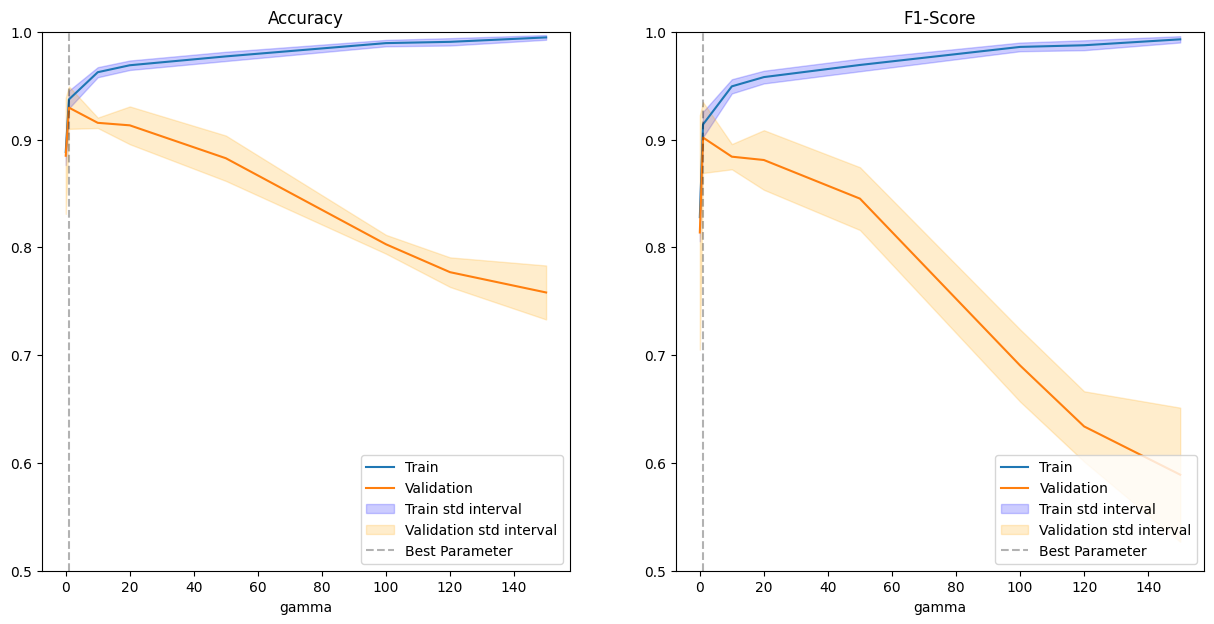

In [600]:
train_acc_interval = (ksvc_search_results['mean_train_accuracy'] - ksvc_search_results['std_train_accuracy'], ksvc_search_results['mean_train_accuracy'] + ksvc_search_results['std_train_accuracy'])
test_acc_interval = (ksvc_search_results['mean_test_accuracy'] - ksvc_search_results['std_test_accuracy'], ksvc_search_results['mean_test_accuracy'] + ksvc_search_results['std_test_accuracy'])
train_f1_interval = (ksvc_search_results['mean_train_f1'] - ksvc_search_results['std_train_f1'], ksvc_search_results['mean_train_f1'] + ksvc_search_results['std_train_f1'])
test_f1_interval = (ksvc_search_results['mean_test_f1'] - ksvc_search_results['std_test_f1'], ksvc_search_results['mean_test_f1'] + ksvc_search_results['std_test_f1'])

_, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].plot(ksvc_search_results["param_gamma"], ksvc_search_results['mean_train_accuracy'], label="Train")
ax[0].plot(ksvc_search_results["param_gamma"], ksvc_search_results['mean_test_accuracy'], label="Validation")
ax[1].plot(ksvc_search_results["param_gamma"], ksvc_search_results['mean_train_f1'], label="Train")
ax[1].plot(ksvc_search_results["param_gamma"], ksvc_search_results['mean_test_f1'], label="Validation")

ax[0].fill_between(ksvc_search_results["param_gamma"].astype("float"), train_acc_interval[0], train_acc_interval[1], color='blue', alpha=0.2, label='Train std interval')
ax[0].fill_between(ksvc_search_results["param_gamma"].astype("float"), test_acc_interval[0], test_acc_interval[1], color='orange', alpha=0.2, label='Validation std interval')
ax[1].fill_between(ksvc_search_results["param_gamma"].astype("float"), train_f1_interval[0], train_f1_interval[1], color='blue', alpha=0.2, label='Train std interval')
ax[1].fill_between(ksvc_search_results["param_gamma"].astype("float"), test_f1_interval[0], test_f1_interval[1], color='orange', alpha=0.2, label='Validation std interval')

ax[0].axvline(x=ksvc_search.best_params_['gamma'], color='black', alpha=0.3, linestyle='--', label='Best Parameter')
ax[1].axvline(x=ksvc_search.best_params_['gamma'], color='black', alpha=0.3, linestyle='--', label='Best Parameter')

ax[0].set_title("Accuracy")
ax[1].set_title("F1-Score")
ax[0].set_xlabel("gamma")
ax[1].set_xlabel("gamma")
ax[0].set_ylim(0.5, 1)
ax[1].set_ylim(0.5, 1)
ax[0].legend(loc="lower right")
ax[1].legend(loc="lower right")

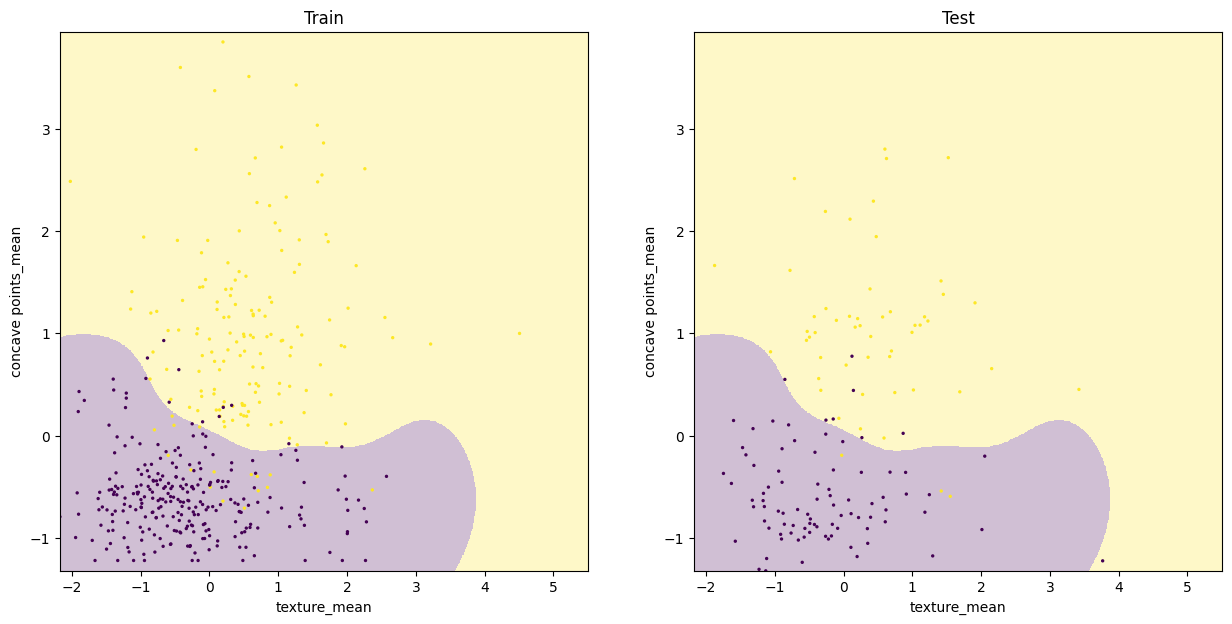

In [601]:
ksvc = ksvc_search.best_estimator_

# Create a mesh to plot the decision boundary
_, ax = plt.subplots(1,2, figsize=(15,7))
x_min, x_max = X_train[feature_1].min(), X_train[feature_1].max() + 1
y_min, y_max = X_train[feature_2].min() - 0.1, X_train[feature_2].max() + 0.1
ax[0].set(xlim=(x_min, x_max), ylim=(y_min, y_max))
ax[1].set(xlim=(x_min, x_max), ylim=(y_min, y_max))

DecisionBoundaryDisplay.from_estimator(
  estimator=ksvc,
  X=X_train,
  ax=ax[0],
  response_method="predict",
  plot_method='pcolormesh',
  alpha=0.25,
  grid_resolution=1000
)
ax[0].set_title("Train")
ax[0].scatter(
  X_train[feature_1],
  X_train[feature_2],
  s=2,
  c=y_train,
)

DecisionBoundaryDisplay.from_estimator(
  estimator=ksvc,
  X=X_train,
  ax=ax[1],
  response_method="predict",
  plot_method='pcolormesh',
  alpha=0.25,
  grid_resolution=1000
)
ax[1].set_title("Test")
ax[1].scatter(
  X_test[feature_1],
  X_test[feature_2],
  s=2,
  c=y_test,
)

In [602]:
# Evaluating the model

# Classification report
ksvc_test_predictions = ksvc.predict(X_test)
print(f"Train accuracy : {ksvc.score(X_train, y_train):.3f}")
print(f"Test accuracy : {ksvc.score(X_test, y_test):.3f}")
report = classification_report(y_test, ksvc_test_predictions, target_names=["B", "M"])
print("Classification Report:\n", report)

Train accuracy : 0.939
Test accuracy : 0.923
Classification Report:
               precision    recall  f1-score   support

           B       0.96      0.91      0.94        90
           M       0.86      0.94      0.90        53

    accuracy                           0.92       143
   macro avg       0.91      0.93      0.92       143
weighted avg       0.93      0.92      0.92       143



In [603]:
# Confusion Matrix
conf_matrix_ksvc = confusion_matrix(y_test, ksvc_test_predictions)
print("Confusion Matrix:\n", conf_matrix_ksvc)

Confusion Matrix:
 [[82  8]
 [ 3 50]]


AUC-ROC CURVE FOR ALL MODELS

In [604]:
# SVC Model with Calibration
clf = CalibratedClassifierCV(svc) 
clf.fit(X_train, y_train)
y_proba = clf.predict_proba(X_test)[:,1]

# Test set probability predictions
y_prob_decision_tree = dec_tree.predict_proba(trees_test)[:, 1]
y_prob_random_forest = rf.predict_proba(trees_test)[:, 1]
y_prob_knn = knn.predict_proba(X_test)[:, 1]
y_prob_svc = y_proba
y_prob_ksvc = ksvc.predict_proba(X_test)[:, 1]

# True positive and False positive
fpr_decision_tree, tpr_decision_tree, _ = roc_curve(y_test, y_prob_decision_tree)
fpr_random_forest, tpr_random_forest, _ = roc_curve(y_test, y_prob_random_forest)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_prob_svc)
fpr_kernel_svc, tpr_kernel_svc, _ = roc_curve(y_test, y_prob_ksvc)

# AUC score
auc_decision_tree = roc_auc_score(y_test, y_prob_decision_tree)
auc_random_forest = roc_auc_score(y_test, y_prob_random_forest)
auc_knn = roc_auc_score(y_test, y_prob_knn)
auc_svc = roc_auc_score(y_test, y_prob_svc)
auc_kernel_svc = roc_auc_score(y_test, y_prob_ksvc)

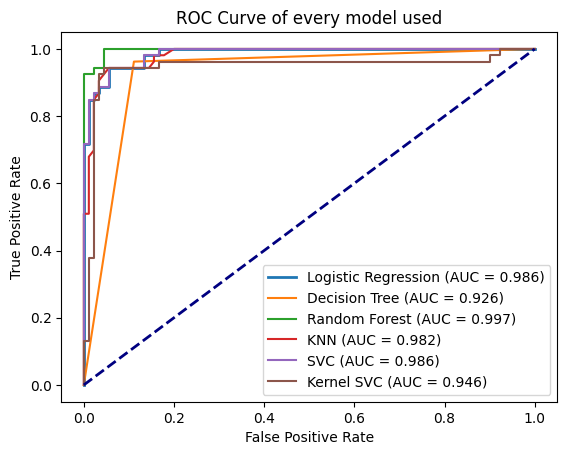

In [605]:
# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, lw=2, label=f'Logistic Regression (AUC = {auc:.3f})')
plt.plot(fpr_decision_tree, tpr_decision_tree, label=f'Decision Tree (AUC = {auc_decision_tree:.3f})')
plt.plot(fpr_random_forest, tpr_random_forest, label=f'Random Forest (AUC = {auc_random_forest:.3f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.3f})')
plt.plot(fpr_svc, tpr_svc, label=f'SVC (AUC = {auc_svc:.3f})')
plt.plot(fpr_kernel_svc, tpr_kernel_svc, label=f'Kernel SVC (AUC = {auc_kernel_svc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of every model used')
plt.legend(loc="lower right")
plt.show()

# Multivariate Analysis

In [606]:
# dataset filtering
important_columns = [
  "diagnosis",
  "texture_mean",
  "smoothness_mean",
  "compactness_mean",
  "concave points_mean",
  "symmetry_mean",
  "fractal_dimension_mean",
  "radius_mean",
]

ma_train, ma_test = train[important_columns], test[important_columns]
ma_y_train = ma_train["diagnosis"]
ma_y_test = ma_test["diagnosis"]
ma_train = pd.DataFrame(scaler.fit_transform(ma_train.drop(columns=["diagnosis"])), columns=important_columns[1:])
ma_test = pd.DataFrame(scaler.fit_transform(ma_test.drop(columns=["diagnosis"])), columns=important_columns[1:])
ma_train.head()

,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_mean
0,-1.226611,2.867732,0.358096,-0.611065,1.423507,1.934426,-1.346359
1,1.310631,-0.874465,-0.973162,-0.777015,-0.494563,-1.111078,-0.315427
2,-1.922488,-0.171007,-0.674153,-0.560197,-0.494563,-0.211116,-0.757851
3,-0.130830,0.793794,0.196720,-0.426984,-0.291899,0.065379,-0.187430
4,-1.398321,2.054973,2.174039,0.551592,0.916847,4.481156,-1.240344


In [607]:
# sample size evaluation

# Evaluate positive values (malignant)
num_positivi = ma_y_train.sum()

# Number of observations in the dataset
n = len(ma_train)

# Evaluate the prevalence
prevalence = num_positivi / n

# Number of events (positive cases)
n_events = n * prevalence
print(f"Number of positive events expected: {n_events}")

# Minimum number of events necessary (rule of 10 events per variable)
n_variables = len(important_columns)
min_necessary_events = 10 * n_variables
print(f"Minimum number of necessary events: {min_necessary_events}")

# Verify whether the sample size is sufficient or not
if n_events >= min_necessary_events:
    print("The sample size is sufficient for the logistic regression model")
else:
    print("The sample size is not sufficient for the logistic regression model")

Number of positive events expected: 159.0
Minimum number of necessary events: 80
The sample size is sufficient for the logistic regression model


In [608]:
# forward selection for Logistic Regression
train_accuracy = []
test_accuracy = []

for i in range(1, len(important_columns) - 1):
  print(f"Max number of features: {i}")
  forward = SequentialFeatureSelector(
    estimator=LogisticRegression(),
    n_features_to_select=i,
    direction='forward',
    scoring="accuracy",
    cv=5
  )

  forward = forward.fit(ma_train, ma_y_train)
  selected_features = ma_train.columns[forward.get_support()].values
  print(f"\tFeatures selected: {', '.join(selected_features)}")
  logistic_regression = LogisticRegression()
  logistic_regression.fit(ma_train[selected_features], ma_y_train)
  train_accuracy.append(logistic_regression.score(ma_train[selected_features], ma_y_train))
  test_accuracy.append(logistic_regression.score(ma_test[selected_features], ma_y_test))
  print(f"\tTrain accuracy: {train_accuracy[-1]}")
  print(f"\tTest accuracy: {test_accuracy[-1]}")

Max number of features: 1
	Features selected: concave points_mean
	Train accuracy: 0.9061032863849765
	Test accuracy: 0.916083916083916
Max number of features: 2
	Features selected: texture_mean, concave points_mean
	Train accuracy: 0.9342723004694836
	Test accuracy: 0.9300699300699301
Max number of features: 3
	Features selected: texture_mean, concave points_mean, fractal_dimension_mean
	Train accuracy: 0.9366197183098591
	Test accuracy: 0.9440559440559441
Max number of features: 4
	Features selected: texture_mean, smoothness_mean, concave points_mean, fractal_dimension_mean
	Train accuracy: 0.9389671361502347
	Test accuracy: 0.9440559440559441
Max number of features: 5
	Features selected: texture_mean, smoothness_mean, concave points_mean, fractal_dimension_mean, radius_mean
	Train accuracy: 0.9413145539906104
	Test accuracy: 0.9440559440559441
Max number of features: 6
	Features selected: texture_mean, smoothness_mean, compactness_mean, concave points_mean, fractal_dimension_mean, r

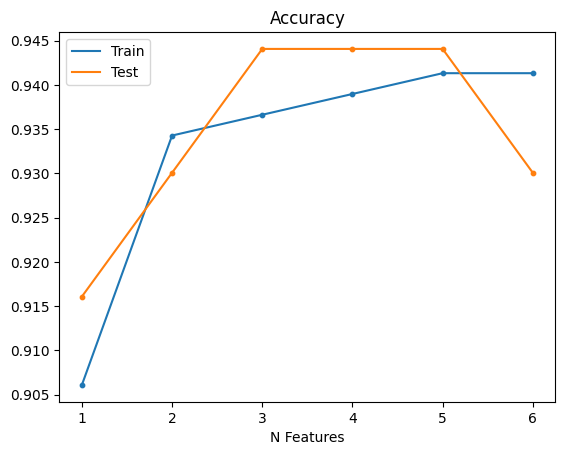

In [609]:
plt.plot(list(range(1,7)), train_accuracy, label="Train")
plt.plot(list(range(1,7)), test_accuracy, label="Test")
plt.scatter(list(range(1,7)), train_accuracy, s=10)
plt.scatter(list(range(1,7)), test_accuracy, s=10)
plt.xlabel("N Features")
plt.title("Accuracy")
plt.legend()